In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('testing'),Path('training')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/9'),Path('training/0'),Path('training/4'),Path('training/7'),Path('training/2'),Path('training/6'),Path('training/1'),Path('training/3'),Path('training/8'),Path('training/5')]

In [ ]:
ones = (path/'training'/'1').ls().sorted() # show the list of images with one
ones

(#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...]

In [ ]:
im1_path = ones[2] # view a sample image
im1 = Image.open(im1_path)
im1

In [ ]:
im1_t = tensor(im1)
im1_t[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [ ]:
df = pd.DataFrame(im1_t[4:25,4:22])
df.style.set_properties(**{'font-size':'8pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,172,189,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,250,149,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,250,149,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,250,149,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,250,149,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,250,149,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,250,149,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,91,254,55,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,96,255,87,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,77,254,149,0,0,0,0,0,0


In [ ]:
one_tensors = [tensor(Image.open(o)) for o in ones]
len(one_tensors)

6742

<Axes: >

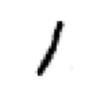

In [ ]:
show_image(one_tensors[1])

In [ ]:
stacked_ones = torch.stack(one_tensors).float()/255
stacked_ones.shape

torch.Size([6742, 28, 28])

In [ ]:
stacked_ones.ndim

3

<Axes: >

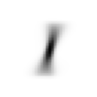

In [ ]:
mean1 = stacked_ones.mean(0)
show_image(mean1)

<Axes: >

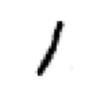

In [ ]:
# take a sample 1

a_1 = stacked_ones[1]
show_image(a_1)

In [ ]:
# try zeroes
zeroes = (path/'training'/'0').ls().sorted() # show the list of images

In [ ]:
im0_path = zeroes[1] # view a sample image
im0 = Image.open(im0_path)
im0

In [ ]:
im0_t = tensor(im0)
df = pd.DataFrame(im0_t[4:25,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,36,146,254,255,251,95,6,0
2,0,0,0,0,0,0,0,0,3,97,234,254,254,232,254,254,35,0
3,0,0,0,0,0,0,0,89,140,254,254,174,67,33,200,254,190,0
4,0,0,0,0,0,0,108,253,254,235,51,1,0,0,12,254,253,56
5,0,0,0,0,0,12,216,254,244,55,0,0,0,0,6,213,254,57
6,0,0,0,0,0,25,254,254,132,0,0,0,0,0,0,168,254,57
7,0,0,0,0,0,45,254,243,34,0,0,0,0,0,0,168,254,57
8,0,0,0,0,0,128,254,157,0,0,0,0,0,0,0,168,254,57
9,0,0,0,0,19,228,254,105,0,0,0,0,0,0,7,228,254,57


In [ ]:
zero_tensors = [tensor(Image.open(o)) for o in zeroes]
stacked_zeroes = torch.stack(zero_tensors).float()/255
stacked_zeroes.shape

torch.Size([5923, 28, 28])

<Axes: >

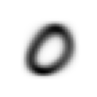

In [ ]:
mean0 = stacked_zeroes.mean(0)
show_image(mean0)

<Axes: >

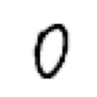

In [ ]:
a_0 = stacked_zeroes[1]
show_image(a_0)

In [ ]:
# different numbers
twos = (path/'training'/'2').ls().sorted()
two_tensors = [tensor(Image.open(o)) for o in twos]
stacked_twos = torch.stack(two_tensors).float()/255
mean2 = stacked_twos.mean(0)

In [ ]:
threes = (path/'training'/'3').ls().sorted()
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_threes = torch.stack(three_tensors).float()/255
mean3 = stacked_threes.mean(0)

In [ ]:
fours = (path/'training'/'4').ls().sorted()
four_tensors = [tensor(Image.open(o)) for o in fours]
stacked_fours = torch.stack(four_tensors).float()/255
mean4 = stacked_fours.mean(0)

In [ ]:
fives = (path/'training'/'5').ls().sorted()
five_tensors = [tensor(Image.open(o)) for o in fives]
stacked_fives = torch.stack(five_tensors).float()/255
mean5 = stacked_fives.mean(0)

In [ ]:
sixes = (path/'training'/'6').ls().sorted()
six_tensors = [tensor(Image.open(o)) for o in sixes]
stacked_sixes = torch.stack(six_tensors).float()/255
mean6 = stacked_sixes.mean(0)

In [ ]:
sevens = (path/'training'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
stacked_sevens = torch.stack(seven_tensors).float()/255
mean7 = stacked_sevens.mean(0)

In [ ]:
eights = (path/'training'/'8').ls().sorted()
eight_tensors = [tensor(Image.open(o)) for o in eights]
stacked_eights = torch.stack(eight_tensors).float()/255
mean8 = stacked_eights.mean(0)

In [ ]:
nines = (path/'training'/'9').ls().sorted()
nine_tensors = [tensor(Image.open(o)) for o in nines]
stacked_nines = torch.stack(nine_tensors).float()/255
mean9 = stacked_nines.mean(0)

In [ ]:
#find the sum of..
sum_mean = (mean0 + mean1 + mean2 + mean3 + mean4 + mean5 + mean6 + mean7 + mean8 + mean9)/10

In [ ]:
#determine the distance from our ideal 1

dist_1_abs = (a_1 - mean1).abs().mean() # mean absolute difference
dist_1_sqr = ((a_1 - mean1)**2).mean().sqrt() # root mean squared error
dist_1_abs,dist_1_sqr

(tensor(0.0601), tensor(0.1520))

In [ ]:
# loss function

F.l1_loss(a_1.float(), sum_mean - (mean1/10)), F.mse_loss(a_1, sum_mean - (mean1/10)).sqrt()

(tensor(0.1297), tensor(0.2202))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [ ]:
def is_0(x): return mnist_distance(x,mean0) < mnist_distance(x, sum_mean - (mean0/10))
def is_1(x): return mnist_distance(x,mean1) < mnist_distance(x, sum_mean - (mean1/10))
def is_2(x): return mnist_distance(x,mean2) < mnist_distance(x, sum_mean - (mean2/10))
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x, sum_mean - (mean3/10))
def is_4(x): return mnist_distance(x,mean4) < mnist_distance(x, sum_mean - (mean4/10))
def is_5(x): return mnist_distance(x,mean5) < mnist_distance(x, sum_mean - (mean5/10))
def is_6(x): return mnist_distance(x,mean6) < mnist_distance(x, sum_mean - (mean6/10))
def is_7(x): return mnist_distance(x,mean7) < mnist_distance(x, sum_mean - (mean7/10))
def is_8(x): return mnist_distance(x,mean8) < mnist_distance(x, sum_mean - (mean8/10))
def is_9(x): return mnist_distance(x,mean9) < mnist_distance(x, sum_mean - (mean9/10))

In [ ]:
is_1(a_1), is_1(a_1).float()

(tensor(True), tensor(1.))

In [ ]:
# validation set

valid_0_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'0').ls()])
valid_0_tens = valid_0_tens.float()

valid_1_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'1').ls()])
valid_1_tens = valid_1_tens.float()

valid_2_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'2').ls()])
valid_2_tens = valid_2_tens.float()

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'3').ls()])
valid_3_tens = valid_3_tens.float()

valid_4_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'4').ls()])
valid_4_tens = valid_4_tens.float()

valid_5_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'5').ls()])
valid_5_tens = valid_5_tens.float()

valid_6_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'6').ls()])
valid_6_tens = valid_6_tens.float()

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'7').ls()])
valid_7_tens = valid_7_tens.float()

valid_8_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'8').ls()])
valid_8_tens = valid_8_tens.float()

valid_9_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'testing'/'9').ls()])
valid_9_tens = valid_9_tens.float()


In [ ]:
#acc helper function

def is_num(n):
  is_0s = (is_0(n).float()).mean()
  is_1s = (is_1(n).float()).mean()
  is_2s = (is_2(n).float()).mean()
  is_3s = (is_3(n).float()).mean()
  is_4s = (is_4(n).float()).mean()
  is_5s = (is_5(n).float()).mean()
  is_6s = (is_6(n).float()).mean()
  is_7s = (is_7(n).float()).mean()
  is_8s = (is_8(n).float()).mean()
  is_9s = (is_9(n).float()).mean()

  return max(is_0s, is_1s, is_2s, is_3s, is_4s, is_5s, is_6s, is_7s, is_8s, is_9s)



In [ ]:
#accuracy
accuracy_0s = is_num(valid_0_tens)
accuracy_1s = is_num(valid_1_tens)
accuracy_2s = is_num(valid_2_tens)
accuracy_3s = is_num(valid_3_tens)
accuracy_4s = is_num(valid_4_tens)
accuracy_5s = is_num(valid_5_tens)
accuracy_6s = is_num(valid_6_tens)
accuracy_7s = is_num(valid_7_tens)
accuracy_8s = is_num(valid_8_tens)
accuracy_9s = is_num(valid_9_tens)

sum_acc = accuracy_0s + accuracy_1s + accuracy_2s + accuracy_3s + accuracy_4s + accuracy_5s + accuracy_6s + accuracy_7s + accuracy_8s + accuracy_9s
accuracy_0s, accuracy_1s, accuracy_2s, accuracy_3s,accuracy_4s,accuracy_5s,accuracy_6s,accuracy_7s,accuracy_8s,accuracy_9s,sum_acc/10

(tensor(0.9653),
 tensor(1.),
 tensor(0.9293),
 tensor(0.9762),
 tensor(0.9959),
 tensor(0.9047),
 tensor(0.9906),
 tensor(0.9864),
 tensor(0.9908),
 tensor(0.9970),
 tensor(0.9736))

Stochastic Gradient Descent (This Week)

In [ ]:
# create the MNIST loss function

# concatenate the images into a single tensor and then change the type of the result to a list of vectors

# train_x = torch.cat([stacked_zeroes, stacked_ones, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, stacked_eights, stacked_nines]).view(-1, 28*28)
# train_x = torch.cat([stacked_ones, stacked_zeroes]).view(-1, 28*28)
train_x = torch.cat([stacked_ones, stacked_zeroes, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, stacked_eights, stacked_nines]).view(-1, 28*28)
train_x.shape

torch.Size([60000, 784])

In [ ]:
# sum up the lengths for images of all digits aside from 1

train_len = len(zeroes) + len(twos) + len(threes) + len(fours) + len(fives) + len(sixes) + len(sevens) + len(eights) + len(nines)

In [ ]:
# we need a label for each image so
#train_y = tensor([9]*len(nines) + [8] * len(eights) + [7] * len(sevens) + [6]* len(sixes) + [5]*len(fives) + [4]*len(fours) + [3]*len(threes)+ [2]*len(twos) + [1]*len(ones) + [0]*len(zeroes)).unsqueeze(1)
train_y = tensor([1]*len(ones) + [0]*train_len).unsqueeze(1)
#train_y = tensor([1]*len(ones) + [0]*len(zeroes)).unsqueeze(1)

In [ ]:
# find the shape of both training sets
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [ ]:
# uses the list and zip function to return the indexed dataset as a tuple
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
# take the len of all validation images of digits aside from 1
valid_len = len(valid_0_tens) + len(valid_2_tens) + len(valid_3_tens) + len(valid_4_tens) + len(valid_5_tens) + len(valid_6_tens) + len(valid_7_tens) + len(valid_8_tens) + len(valid_9_tens)

In [ ]:
len(valid_0_tens)

980

In [ ]:
valid_x = torch.cat([valid_1_tens, valid_0_tens, valid_2_tens, valid_3_tens, valid_4_tens, valid_5_tens, valid_6_tens, valid_7_tens, valid_8_tens, valid_9_tens]).view(-1, 28*28)
# valid_x = torch.cat([valid_1_tens, valid_len]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_1_tens) + [0]*valid_len).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [ ]:
# create an initally random weight for every pixel (initalize step)

def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([-8.7663], grad_fn=<AddBackward0>)

In [ ]:
# use matrix multiplication to calculate the prediction for each image
# more efficient than loops

def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -8.7663],
        [ -8.2612],
        [ -5.4104],
        ...,
        [ -8.8975],
        [-10.6736],
        [ -6.4075]], grad_fn=<AddBackward0>)

In [ ]:
# check the accuracy by finding whether it's greater than 0.0 to decide whether the number is 1.
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [ ]:
corrects.float().mean().item()

0.7790499925613403

In [ ]:
# find the change in accuracy for a small change in one of the weights

with torch.no_grad(): weights[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.7790499925613403

In [ ]:
# measure the difference between the predicted values and the true values (targets/labels)
trgts  = tensor([1,0,1])  # tells whether the image actually is a 1
prds   = tensor([0.9, 0.4, 0.2]) # each value is the prediction that an image is a 1

In [ ]:
# create a loss function to measure the distance between predictions and targets
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
# where function measures how distant each function is from a number if it should be that number
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
# need a scalar for the final loss; takes the mean of the previous tensor
mnist_loss(prds,trgts)

tensor(0.4333)

In [ ]:
# change our prediction of the "false target" from 0.2 to 0.8, so the loss will go down
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

In [ ]:
# always outputs a number between 0 and 1
def sigmoid(x): return 1/(1+torch.exp(-x))

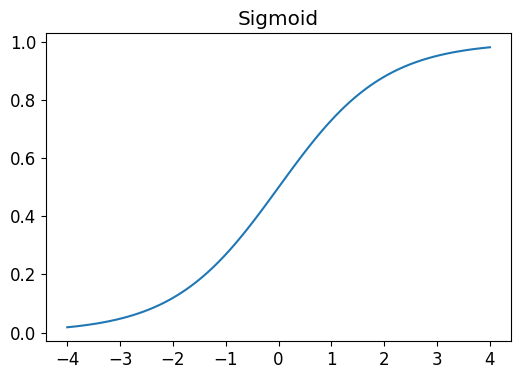

In [ ]:
# graph the function
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
# update mnist_loss to apply the sigmoid function to the inputs

def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
# Dataloader takes any Python collection and turns it into an iterator over small
# batches
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
# reinitalize our parameters to fit the image size
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
# a dataloader can be created from a dataset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
# repeat for the validation set
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
# create a batch of 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[-1.3872],
        [ 5.8706],
        [-1.1280],
        [ 3.9634]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.3943, grad_fn=<MeanBackward0>)

In [ ]:
# calculate the gradients

loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0046), tensor([-0.0914]))

In [ ]:
# let's put all of that into a function

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
# test the function
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0093), tensor([-0.1829]))

In [ ]:
# set the gradients to 0 so that it doesn't change the gradients each time the function is called
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
# update the weights and biases based on the gradient.
# be sure to inform torch not to take the gradient for this function or else
# computing the derivative of the batch will be confusing

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
# check the accuracy of the batches
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [ True],
        [False],
        [ True]])

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [ ]:
# now lets check the accuracy of the epoch
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.3334

In [ ]:
# let's train for one epoch and see if the accuracy improves

lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8893

In [ ]:
# repeat 20 times

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9021 0.9285 0.946 0.9564 0.9624 0.9675 0.9705 0.9736 0.9767 0.9778 0.9797 0.9812 0.9821 0.983 0.9839 0.9847 0.9854 0.986 0.9866 0.9867 

Optimizer

In [ ]:
linear_model = nn.Linear(28*28, 1)

In [ ]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self, params, lr):
    self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
# the training loop can be simplified to
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.7016

In [ ]:
# let's put the training loop into a function

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.8892 0.8927 0.9112 0.9224 0.9295 0.9356 0.9409 0.9462 0.9513 0.9555 0.9586 0.9614 0.9638 0.9669 0.9693 0.9713 0.9727 0.9744 0.9759 0.9771 

In [ ]:
# let's use the SGD class to train the model since it's easier
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.8892 0.8935 0.9109 0.9216 0.9294 0.9352 0.9404 0.9461 0.9509 0.9554 0.9581 0.9612 0.9637 0.9671 0.9694 0.9712 0.9725 0.9746 0.9757 0.9771 

In [ ]:
# fastai provides Learner.fit which we could use
# first, create a dataloaders set with training and test dataloaders
dls = DataLoaders(dl, valid_dl)

In [ ]:
# create a learner
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
# call fit
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.002179,0.113500,0.886500,00:00
1,0.001573,0.109138,0.890900,00:00
2,0.001398,0.091523,0.908400,00:00
3,0.001429,0.080404,0.919600,00:00
4,0.001492,0.072878,0.927100,00:00
5,0.001573,0.066642,0.933400,00:00
6,0.001660,0.060843,0.939200,00:00
7,0.001747,0.055523,0.944400,00:00
8,0.001831,0.050253,0.949700,00:00
9,0.001911,0.045871,0.954200,00:00


Adding a Nonlinearity

In [ ]:
from base64 import b16decode
# let's make our linear classifier a bit more complex

# our basic neural network
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [ ]:
# let's replace the simple network function with something more efficient
# using PyTorch
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
# since nn.Sequential is a module, we can get its parameters
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.005851,0.113500,0.886500,00:01
1,0.004206,0.110497,0.889600,00:01
2,0.002878,0.078323,0.921700,00:01
3,0.002705,0.062294,0.937700,00:01
4,0.002683,0.052990,0.947100,00:00
5,0.002711,0.045417,0.954600,00:00
6,0.002757,0.040886,0.959100,00:00
7,0.002804,0.036318,0.963600,00:00
8,0.002847,0.032534,0.967500,00:00
9,0.002884,0.029708,0.970300,00:00


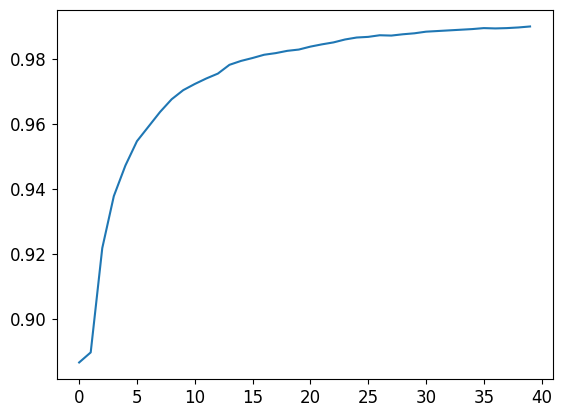

In [ ]:
# plot the accuracy over training
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
# the final accuracy
learn.recorder.values[-1][2]

0.9898999929428101

In [ ]:
print(path)
print(path.ls())

/root/.fastai/data/mnist_png
[Path('testing'), Path('training')]


In [ ]:
# let's try an 18-layer model using the same approach
path = untar_data(URLs.MNIST_SAMPLE)
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.122027,0.037101,0.992149,00:25
